# Hierarchical Clustering

### Data Mining Project 2024/25

Authors: Nicola Emmolo, Simone Marzeddu, Jacopo Raffi

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import StandardScaler

import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
import numpy as np
from scipy.cluster.hierarchy import fcluster

In [3]:
dataset = pd.read_csv('../data/complete_dataset_fe.csv', dtype={'cyclist_team': str})
dataset['date'] = pd.to_datetime(dataset['date'], format='%Y-%m-%d')
# Select relevant columns for clustering
columns_to_use = ['length', 'race_prestige', 'race_physical_effort']
dataset = dataset[columns_to_use].drop_duplicates()

### Races Clustering

In [4]:
data_for_clustering = dataset.dropna() #TODO: remove when we have imputed the missing values

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_clustering)

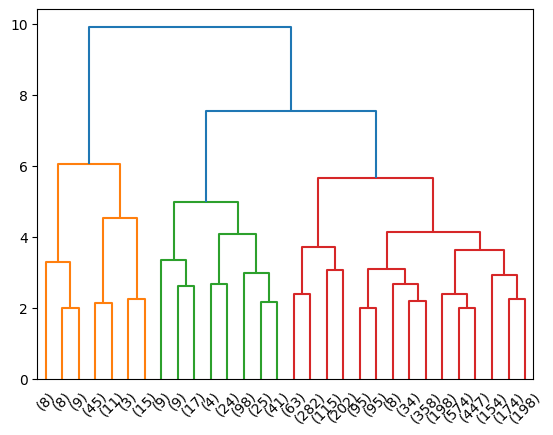

In [5]:
data_dist = pdist(data_scaled, metric='euclidean')
data_link = linkage(data_dist, method='complete', metric='euclidean')
res = dendrogram(data_link, truncate_mode='lastp')

In [6]:
cluster_labels = fcluster(data_link, t=6, criterion='distance')
silhouette_score(data_scaled, cluster_labels)

np.float64(0.36774426695734785)

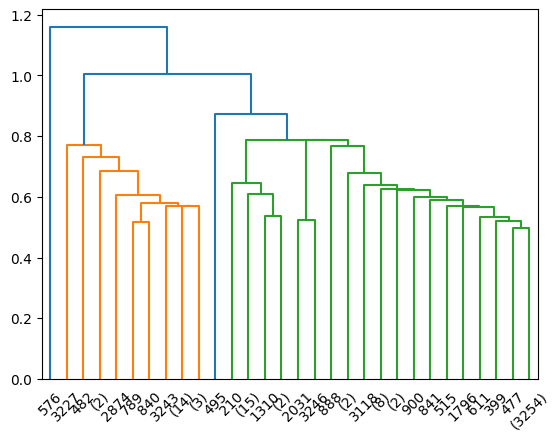

In [7]:
data_dist = pdist(data_scaled, metric='euclidean')
data_link = linkage(data_dist, method='single', metric='euclidean')
res = dendrogram(data_link, truncate_mode='lastp')

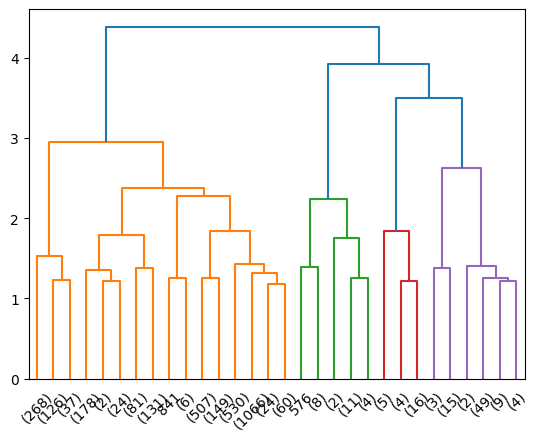

In [8]:
data_dist = pdist(data_scaled, metric='euclidean')
data_link = linkage(data_dist, method='average', metric='euclidean')
res = dendrogram(data_link, truncate_mode='lastp')

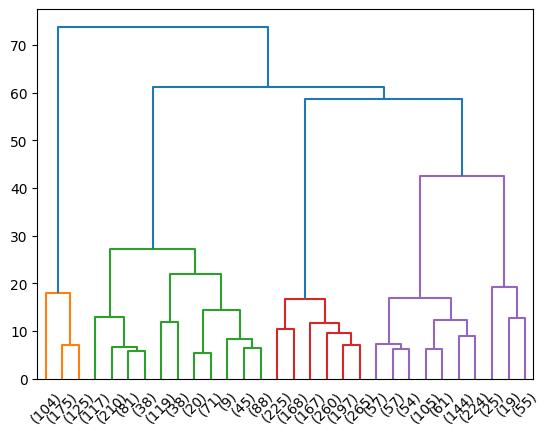

In [9]:
data_dist = pdist(data_scaled, metric='euclidean')
data_link = linkage(data_dist, method='ward', metric='euclidean')
res = dendrogram(data_link, truncate_mode='lastp')

### Races-Cyclist Clustering

In [11]:
dataset = pd.read_csv('../data/complete_dataset_fe.csv', dtype={'cyclist_team': str})
dataset['date'] = pd.to_datetime(dataset['date'], format='%Y-%m-%d')
dataset = dataset[dataset['race_name'] == 'Ronde van Vlaanderen']

In [12]:
# Select relevant columns for clustering
columns_to_use = ['length','race_prestige', 'race_physical_effort', 'cyclist_bmi', 'cyclist_age', 'height', 'cyclist_climb_power', 'position', 'delta']

data_for_clustering = dataset[columns_to_use].dropna() #TODO: remove when we have imputed the missing values

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_clustering)

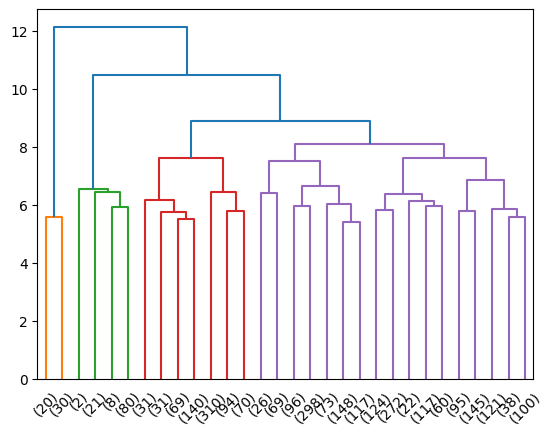

In [13]:
data_dist = pdist(data_scaled, metric='euclidean')
data_link = linkage(data_dist, method='complete', metric='euclidean')
res = dendrogram(data_link, truncate_mode='lastp')

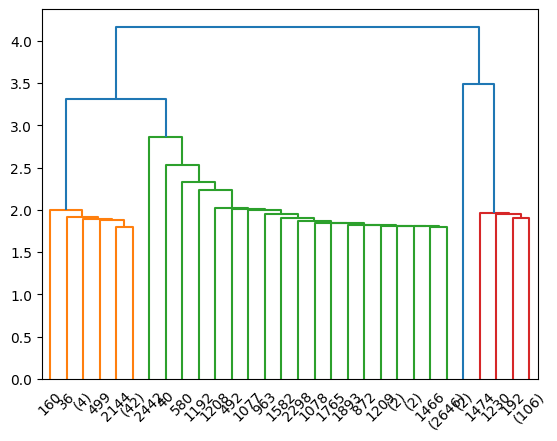

In [14]:
data_dist = pdist(data_scaled, metric='euclidean')
data_link = linkage(data_dist, method='single', metric='euclidean')
res = dendrogram(data_link, truncate_mode='lastp')

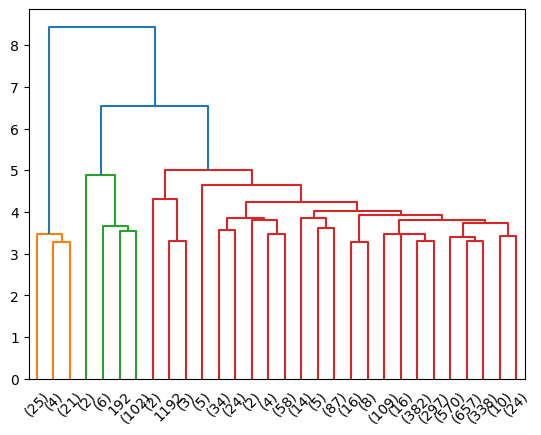

In [15]:
data_dist = pdist(data_scaled, metric='euclidean')
data_link = linkage(data_dist, method='average', metric='euclidean')
res = dendrogram(data_link, truncate_mode='lastp')

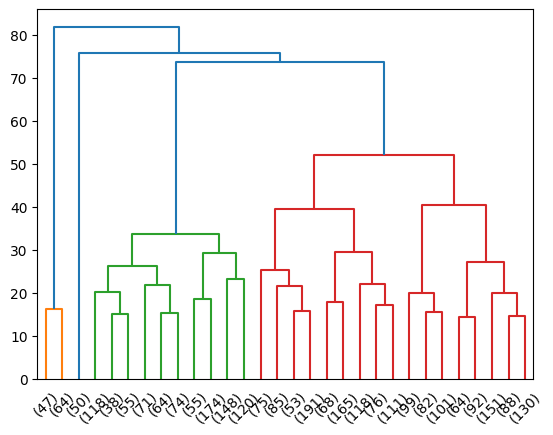

In [16]:
data_dist = pdist(data_scaled, metric='euclidean')
data_link = linkage(data_dist, method='ward', metric='euclidean')
res = dendrogram(data_link, truncate_mode='lastp')

## TODO: Sottostante codice modello per ulteriori analisi

In [17]:
# Cluster Labels extraction
cluster_labels = fcluster(data_link, t=4, criterion='distance')

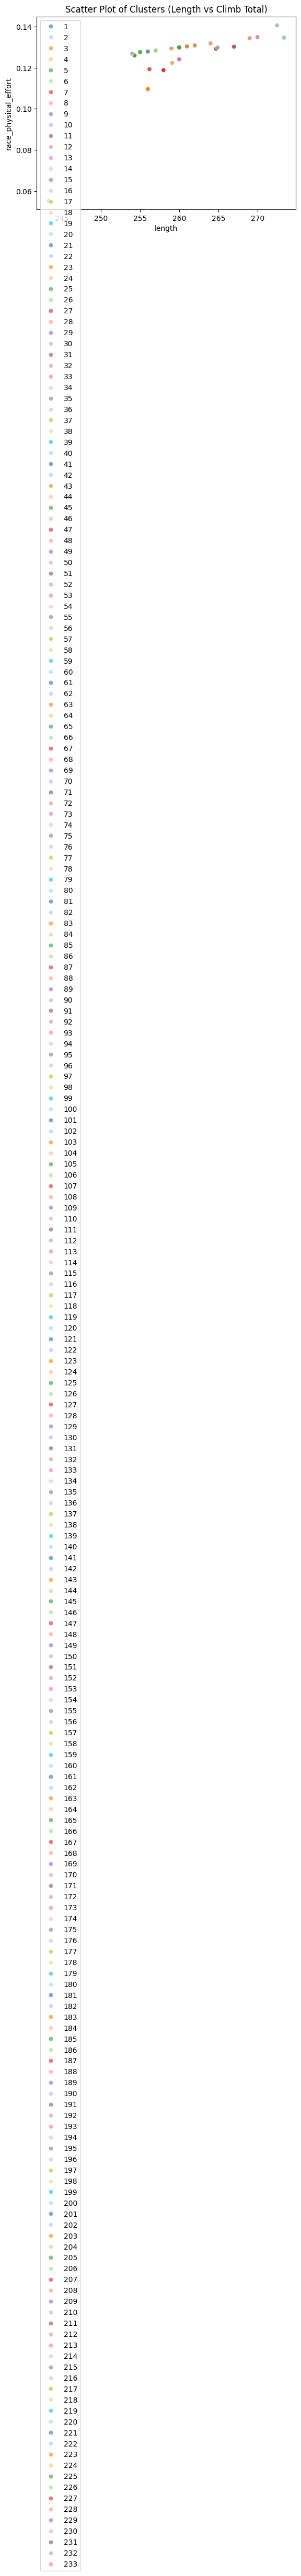

In [18]:
# Scatter plot of a few features to visualize clusters
sns.scatterplot(
    x='length', y='race_physical_effort', hue=cluster_labels, palette='tab20',
    data=data_for_clustering, legend='full', alpha=0.6
)
plt.title("Scatter Plot of Clusters (Length vs Climb Total)")
plt.show()

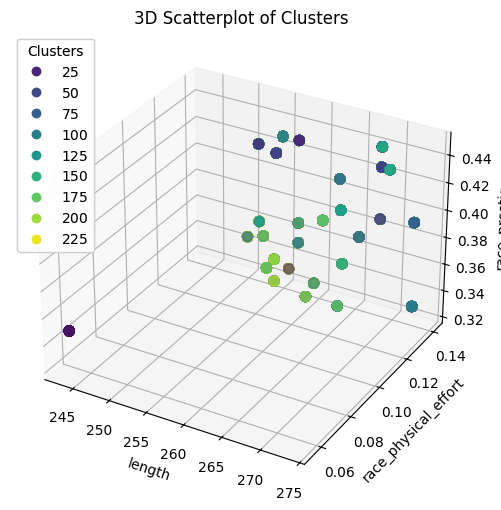

In [19]:
x = data_for_clustering['length']  # Prima feature
y = data_for_clustering['race_physical_effort']  # Seconda feature
z = data_for_clustering['race_prestige']  # Terza feature

# Crea il grafico 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatterplot
scatter = ax.scatter(x, y, z, c=cluster_labels, cmap='viridis', s=50)
ax.set_xlabel('length')
ax.set_ylabel('race_physical_effort')
ax.set_zlabel('race_prestige')

# Aggiungi una legenda (opzionale)
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.title('3D Scatterplot of Clusters')

# Abilita la modalità interattiva
plt.ion()
plt.show()